## 3.1、从感知机到神经网络

### 3.1.1、神经网络的例子

用图来表示神经网络的话，如图3-1所示。  
我们把最左边的一列称为`输入层`，最右边的一列称为`输出层`，中间的一列称为`中间层`。  
`中间层`有时也称为`隐藏层`。  
“隐藏”一词的意思是，隐藏层的神经元（和输入层、输出层不同）肉眼看不见。  
另外，本书中把输入层到输出层依次称为第0层、第1层、第2层（层号之所以从0开始，是为了方便后面基于Python进行实现）。  
图3-1中，第0层对应输入层，第1层对应中间层，第2层对应输出层。  
<img src="./imgs/3_1.png">

图 3-1 中的网络一共由 3 层神经元构成，但实质上只有2层神经元有权重，因此将其称为“2层网络”。  
请注意，有的书也会根据构成网络的层数，把图3-1的网络称为“3层网络”。  
本书将根据实质上拥有权重的层数（输入层、隐藏层、输出层的总数减去1后的数量）来表示网络的名称。

### 3.1.2、复习感知机

<img src="./imgs/3_2.png">

图3-2中的感知机接收x1和x2两个输入信号，输出y。如果用数学式来
表示图3-2中的感知机，则如式（3.1）所示:$$
y = \left\{ \begin{array} { l l } { 0 } & { \left( b + w _ { 1 } x _ { 1 } + w _ { 2 } x _ { 2 } \leqslant 0 \right) } \\ { 1 } & { \left( b + w _ { 1 } x _ { 1 } + w _ { 2 } x _ { 2 } > 0 \right) } \end{array} \right.
$$<center>式（3.1）</center>

b是被称为偏置的参数，用于控制神经元被激活的容易程度；  
而w1和w2是表示各个信号的权重的参数，用于控制各个信号的重要性。

在图3-2的网络中，偏置b并没有被画出来。如果要明确地表示出b，可以像图3-3那样做。  
图3-3中添加了权重为b的输入信号1。这个感知机将x1、 x2、 1三个信号作为神经元的输入，将其和各自的权重相乘后，传送至下一个神经元。  
在下一个神经元中，计算这些加权信号的总和。  
如果这个总和超过0，则输出1，否则输出0。  
另外，由于偏置的输入信号一直是1，所以为了区别于其他神经元，我们在图中把这个神经元整个涂成灰色。

现在将式（3.1）改写成更加简洁的形式。为了简化式（3.1），我们用一个
函数来表示这种分情况的动作（超过0则输出1，否则输出0）。引入新函数
h(x)，将式（3.1）改写成下面的式（3.2）和式（3.3）

$$
y = h \left( b + w _ { 1 } x _ { 1 } + w _ { 2 } x _ { 2 } \right)
$$<center>式（3.2）</center>

$$
h ( x ) = \left\{ \begin{array} { l l } { 0 } & { ( x \leqslant 0 ) } \\ { 1 } & { ( x > 0 ) } \end{array} \right.
$$<center>式（3.3）</center>

<img src="./imgs/3_3.jpg">

### 3.1.3、激活函数

h（x）函数会将输入信号的总和转换为输出信号，这种函数一般称为`激活函数`（activation function）。  
激活函数的作用在于`决定如何来激活输入信号的总和`。  

式（3.2）分两个阶段进行处理，先计算输入信号的加权总和，然后用激活函数转换这一总和。  
因此，如果将式（3.2）写得详细一点，则可以分成下面两个式子：$$
a = b + w _ { 1 } x _ { 1 } + w _ { 2 } x _ { 2 }
$$ <center>式（3.4）</center>  
$$
y = h ( a )
$$<center>式（3.5）</center>

式（3.4）计算加权输入信号和偏置的总和，记为a。  
然后，式（3.5）用h()函数将a转换为输出y。

之前的神经元都是用一个○表示的，如果要在图中明确表示出式（3.4）
和式（3.5），则可以像图3-4这样做：<img src="./imgs/3_4.png">

表示神经元的○中明确显示了激活函数的计算过程，即信号的加权总和为节点a，然后节点a被激活函数h()转换成节点y。  
本书中，“神经元”和“节点”两个术语的含义相同。  
这里，我们称a和y为“节点”，其实它和之前所说的“神经元”含义相同

通常如图3-5的左图所示，神经元用一个○表示。本书中，在可以明确
神经网络的动作的情况下，将在图中明确显示激活函数的计算过程，如图3-5
的右图所示。

<img src="./imgs/3_5.png"></img>

`激活函数是连接感知机和神经网络的桥梁。 `

本书在使用“感知机”一词时，没有严格统一它所指的算法。  
一般而言，“朴素感知机”是指单层网络，指的是激活函数使用了阶跃函数的模型。  
“多层感知机”是指神经网络，即使用sigmoid 函数（ 后述）等平滑的激活函数的多层网络。

## 3.2、激活函数

### 3.2.1、sigmoid函数

神经网络中经常使用的一个激活函数就是式（3.6）表示的`sigmoid函数`（sigmoid function）

$$
h ( x ) = \frac { 1 } { 1 + \exp ( - x ) }
$$<center>式（3.6）</center>

式（3.6）中的exp(−x)表示e的-x次方，e是纳皮尔常数2.7182...。

神经网络中用sigmoid函数作为激活函数，进行信号的转换，转换后的信号被传送给下一个神经元。  
实际上，上一章介绍的感知机和接下来要介绍的神经网络的主要区别就在于这个激活函数。  
其他方面，比如神经元的多层连接的构造、信号的传递方法等，基本上和感知机是一样的。  

### 3.2.2、阶跃函数的实现

`阶跃函数`是指一旦输入超过阈值，就切换输出的函数。

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

这个实现简单、易于理解，但是参数 x只能接受实数（浮点数）。  
也就是说，允许形如step_function(3.0)的调用，但不允许参数取NumPy数组，例如step_function(np.array([1.0, 2.0]))。  
为了便于后面的操作，我们把它修改为支持NumPy数组的实现。为此，可以考虑下述实现。  

In [14]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

由于使用了NumPy中的“技巧”，可能会有点难理解。  
我们通过Python解释器的例子来看一下这里用了什么技巧。  
下面这个例子中准备了NumPy数组x，并对这个NumPy数组进行了不等号运算。  

In [15]:
x=np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [16]:
y=x>0
y

array([False,  True,  True])

对NumPy数组进行不等号运算后，数组的各个元素都会进行不等号运算，生成一个布尔型数组。  
这里，数组 x中大于0的元素被转换为 True，小于等于0的元素被转换为False，从而生成一个新的数组y。

数组y是一个布尔型数组，但是我们想要的阶跃函数是会输出int型的0或1的函数。  
因此，需要把数组y的元素类型从布尔型转换为int型。  

In [17]:
y = y.astype(np.int)
y

array([0, 1, 1])

可以用 astype()方法转换NumPy数组的类型。   
astype()方法通过参数指定期望的类型，这个例子中是 np.int型。   
Python中将布尔型转换为int型后， True会转换为1， False会转换为0。  

### 3.2.3、阶跃函数的图形

(-0.1, 1.1)

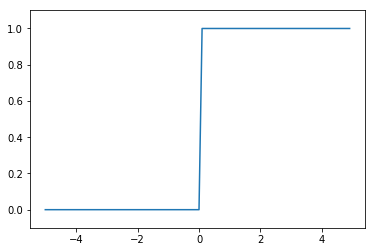

In [18]:
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()
%matplotlib inline

阶跃函数以0为界，输出从0切换为1（或者从1切换为0）。  
它的值呈阶梯式变化，所以称为`阶跃函数`。

### 3.2.4、sigmoid函数的实现

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

sigmoid函数的实现能支持NumPy数组，秘密就在于NumPy的广播功能。  
根据NumPy 的广播功能，如果在标量和NumPy数组之间进行运算，则标量会和NumPy数组的各个元素进行运算。  

In [21]:
t=np.array([1.0,2.0,3.0])
1.0+t
1.0/t

array([2., 3., 4.])

array([1.        , 0.5       , 0.33333333])

(-0.1, 1.1)

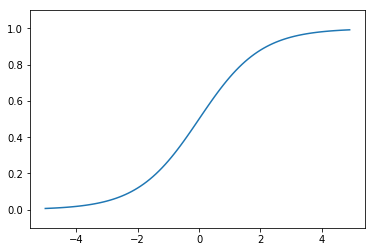

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### 3.2.5、sigmoid函数和阶跃函数的比较

不同点：  
1、`平滑性`的不同。`sigmoid函数`是一条`平滑的曲线`，输出随着输入发生`连续性的变化`。而`阶跃函数`以0为界，输出`发生急剧性的变化`。  
sigmoid函数的平滑性对神经网络的学习具有重要意义。  
2、相对于阶跃函数只能返回0或1， sigmoid函数可以返回0.731 . . .、 0.880 . . .等实数（这一点和刚才的平滑性有关）。
也就是说，感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号。  
共同点：  
1、输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。  
2、不管输入信号有多小，或者有多大，输出信号的值都在0到1之间。  

### 3.2.6、非线性函数

阶跃函数和sigmoid函数还有其他共同点，就是两者均为非线性函数。  
sigmoid函数是一条曲线，阶跃函数是一条像阶梯一样的折线，两者都属于非线性的函数。  

在介绍激活函数时，经常会看到“非线性函数”和“线性函数”等术语。  
函数本来是输入某个值后会返回一个值的转换器。  
向这个转换器输入某个值后，输出值是输入值的常数倍的函数称为线性函数（用数学式表示为h(x) = cx。 c为常数）。  
因此，线性函数是一条笔直的直线。  
而非线性函数，顾名思义，指的是不像线性函数那样呈现出一条直线的函数。  

**神经网络的激活函数必须使用非线性函数。**  
因为使用线性函数的话，加深神经网络的层数就没有意义了。

线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无隐藏层的神经网络”。  
为了具体地（稍微直观地）理解这一点，我们来思考下面这个简单的例子。  
这里我们考虑把线性函数 h(x) = cx 作为激活函数，把y(x) = h(h(h(x)))的运算对应3层神经网络 A。  这个运算会进行y(x) = c × c × c × x的乘法运算，但是同样的处理可以由y(x) = ax（注意，a = c3）这一次乘法运算（即没有隐藏层的神经网络）来表示。  
如本例所示，使用线性函数时，无法发挥多层网络带来的优势。  
因此，为了发挥叠加层所带来的优势，激活函数必须使用非线性函数。

### 3.2.7、ReLU函数

在神经网络发展的历史上， sigmoid函数很早就开始被使用了，而最近则主要
使用**ReLU**（Rectified Linear Unit）函数。

ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输
出0（图3-9）
<img src="./imgs/3_9.png"></img>

ReLU函数可以表示为:$$
h ( x ) = \left\{ \begin{array} { l l } { x } & { ( x > 0 ) } \\ { 0 } & { ( x \leqslant 0 ) } \end{array} \right.
$$

In [23]:
def relu(x):
    return np.maximum(0, x)

本章剩余部分的内容仍将使用sigmoid函数作为激活函数，但在本书的后半部分，则将主要使用ReLU函数。

## 3.3、多维数组的运算

### 3.3.1、多维数组

In [24]:
A=np.array([1,2,3,4])
A
np.ndim(A)
A.shape
A.shape[0]

array([1, 2, 3, 4])

1

(4,)

4

In [26]:
B=np.array([[1,2],[3,4],[5,6]])
B
np.ndim(B)
B.shape

array([[1, 2],
       [3, 4],
       [5, 6]])

2

(3, 2)

二维数组也称为**矩阵**（matrix）。如图3-10所示，数组的横向排列称为**行**（row），纵向排列称为**列**（column）

### 3.3.2、矩阵乘法

来介绍矩阵（二维数组）的乘积。比如2 × 2的矩阵，其乘积可以像图3-11这样进行计算

<img src="./imgs/3_10_3_11.png"></img>

In [27]:
A = np.array([[1,2], [3,4]])
B=np.array([[5,6],[7,8]])
B.shape
np.dot(A,B) #矩阵乘法

(2, 2)

array([[19, 22],
       [43, 50]])

矩阵A的第1维的元素个数（3）必须和矩阵B的第0维的元素个数（3）相等才能相乘。  
2 × 3的矩阵和3 × 2 的矩阵的乘积

In [28]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [29]:
C = np.array([[1,2], [3,4]])
C.shape
A.shape
np.dot(A,C) #无法相乘

(2, 2)

(2, 3)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

<img src="./imgs/3_12.png"></img>

当A是二维矩阵、 B是一维数组时，如图3-13所示，对应维度的元素个数要保持一致的原则依然成立
<img src="./imgs/3_13.png"></img>

In [30]:
A = np.array([[1,2], [3, 4], [5,6]])
A.shape
B=np.array([7,8])
B.shape
np.dot(A,B)

(3, 2)

(2,)

array([23, 53, 83])

### 3.3.3、神经网络的内积

使用NumPy矩阵来实现神经网络。这里我们以图3-14中的简单神经网络为对象。  
这个神经网络省略了偏置和激活函数，只有权重。  
<img src="./imgs/3_14.png"></img>

In [31]:
X = np.array([1, 2])
X.shape
W = np.array([[1, 3, 5], [2, 4, 6]])
W
W.shape

(2,)

array([[1, 3, 5],
       [2, 4, 6]])

(2, 3)

In [32]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3.4、3层神经网络的实现

这里我们以图3-15的3层神经网络为对象，实现从输入到输出的（前向）处理。

<img src="./imgs/3_15.png"></img>

### 3.4.1、符号确认

在介绍神经网络中的处理之前，我们先导入$$
w _ { 12 } ^ { ( 1 ) } , a _ { 1 } ^ { ( 1 ) }
$$等符号。  
这些符号可能看上去有些复杂，不过因为只在本节使用，稍微读一下就跳过去也问题不大。

本节的重点是神经网络的运算可以作为矩阵运算打包进行。  
因为神经网络各层的运算是通过矩阵的乘法运算打包进行的（从宏观视角来考虑），所以即便忘了（未记忆）具体的符号规则，也不影响理解后面的内容。  

我们先从定义符号开始。  
请看图3-16。图3-16中只突出显示了从输入层神经元x2到后一层的神经元的权重。  
权重和隐藏层的神经元的右上角有一个“(1)”，它表示权重和神经元的层号（即第1层的权重、第1层的神经元）。  
此外，权重的右下角有两个数字，它们是后一层的神经元和前一层的神经元的索引号。  

<img src="./imgs/3_16.png"></img>

### 3.4.2、各层间信号传递的实现

现在看一下从输入层到第1层的第1个神经元的信号传递过程，如图3-17所示。
<img src="./imgs/3_17.png"></img>

图3-17中增加了表示偏置的神经元“1”。  
请注意，偏置的右下角的索引号只有一个。这是因为前一层的偏置神经元（神经元“1”）只有一个。

为了确认前面的内容，现在用数学式表示$$
a _ { 1 } ^ { ( 1 ) }
$$ 。 $$
a _ { 1 } ^ { ( 1 ) }
$$通过加权信号和偏
置的和按如下方式进行计算：$$
a _ { 1 } ^ { ( 1 ) } = w _ { 11 } ^ { ( 1 ) } x _ { 1 } + w _ { 12 } ^ { ( 1 ) } x _ { 2 } + b _ { 1 } ^ { ( 1 ) }
$$
<center>式（3.8）</center>

如果使用矩阵的乘法运算，则可以将第1层的加权和表示成下面
的式（3.9）。$$
\boldsymbol { A } ^ { ( 1 ) } = \boldsymbol { X } \boldsymbol { W } ^ { ( 1 ) } + \boldsymbol { B } ^ { ( 1 ) }
$$<center>式（3.9）</center>

其中， A(1)、 X、 B (1)、 W (1)如下所示:
$$
\boldsymbol { A } ^ { ( 1 ) } = \left( \begin{array} { l l l } { a _ { 1 } ^ { ( 1 ) } } & { a _ { 2 } ^ { ( 1 ) } } & { a _ { 3 } ^ { ( 1 ) } } \end{array} \right)
$$
$$
X = \left( \begin{array} { l l } { x _ { 1 } } & { x _ { 2 } } \end{array} \right)
$$
$$
\boldsymbol { B } ^ { ( 1 ) } = \left( \begin{array} { l l l } { b _ { 1 } ^ { ( 1 ) } } & { b _ { 2 } ^ { ( 1 ) } } & { b _ { 3 } ^ { ( 1 ) } } \end{array} \right)
$$
$$
\boldsymbol { W } ^ { ( 1 ) } = \left( \begin{array} { c c c } { w _ { 11 } ^ { ( 1 ) } } & { w _ { 21 } ^ { ( 1 ) } } & { w _ { 31 } ^ { ( 1 ) } } \\ { w _ { 12 } ^ { ( 1 ) } } & { w _ { 22 } ^ { ( 1 ) } } & { w _ { 32 } ^ { ( 1 ) } } \end{array} \right)
$$

下面我们用NumPy多维数组来实现式（3.9），这里将输入信号、权重、偏置设置成任意值

In [33]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

X.shape
W1.shape
B1.shape

(2,)

(2, 3)

(3,)

In [35]:
A1=np.dot(X,W1)+B1
A1

array([0.3, 0.7, 1.1])

接下来，我们观察第1层中激活函数的计算过程。如果把这个计算过程用图来表示的话，则如图3-18所示:<img src="./imgs/3_18.png"></img>

如图3-18所示，隐藏层的加权和（加权信号和偏置的总和）用a表示，被激活函数转换后的信号用z表示。  
此外，图中h()表示激活函数，这里我们使用的是sigmoid函数。

下面，我们来实现第1层到第2层的信号传递（图3-19）

<img src="./imgs/3_19.png"></img>

In [37]:
Z1 = sigmoid(A1)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

Z1.shape
W2.shape
B2.shape

(3,)

(3, 2)

(2,)

In [38]:
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

最后是第2层到输出层的信号传递（图3-20）。  
输出层的实现也和之前的实现基本相同。  
不过，最后的激活函数和之前的隐藏层有所不同。  

In [40]:
def identity_function(x):
    return x

In [41]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 或者Y = A3

我们定义了 identity_function()函数（也称为“恒等函数”），并将其作为输出层的激活函数。  
恒等函数会将输入按原样输出，因此，这个例子中没有必要特意定义identity_function()。  
这里这样实现只是为了和之前的流程保持统一。  
另外，图3-20中，输出层的激活函数用σ()表示，不同于隐藏层的激活函数h()（σ读作sigma）。  

<img src="./imgs/3_20.png"></img>

输出层所用的激活函数，要根据求解问题的性质决定。  
一般地，**回归问题**可以使用**恒等函数**，**二元分类问题**可以使用**sigmoid函数**，**多元分类问题**可以使用**softmax函数**。  
关于输出层的激活函数，我们将在下一节详细介绍  

### 3.4.3、代码实现小结

我们按照神经网络的实现惯例，只把权重记为大写字母W1，其他的（偏置或中间结果等）都用小写字母表示。

In [42]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [43]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

In [44]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

init_network()函数会进行权重和偏置的初始化，并将它们保存在字典变量network中。  
这个字典变量network中保存了每一层所需的参数（权重和偏置）。   
forward()函数中则封装了将输入信号转换为输出信号的处理过程。  

这里出现了**forward**（前向）一词，它表示的是`从输入到输出方向的传递处理`。  
后面在进行神经网络的训练时，我们将介绍后向（backward，从输出到输入方向）的处理。

至此，神经网络的前向处理的实现就完成了。  
通过巧妙地使用NumPy多维数组，我们高效地实现了神经网络。

## 3.5、输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。  
一般而言，回归问题用恒等函数，分类问题用softmax函数。

### 3.5.1、恒等函数和softmax函数

恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直
接输出。  
因此，在输出层使用恒等函数时，输入信号会原封不动地被输出。  
另外，将恒等函数的处理过程用之前的神经网络图来表示的话，则如图3-21
所示。  
和前面介绍的隐藏层的激活函数一样，恒等函数进行的转换处理可以用一根箭头来表示。  
<img src="./imgs/3_21.png"></img>

分类问题中使用的softmax函数可以用下面的式（3.10）表示:
$$
y _ { k } = \frac { \exp \left( a _ { k } \right) } { \sum _ { i = 1 } ^ { n } \exp \left( a _ { i } \right) }
$$<center>式（3.10）</center>

exp(x)是表示ex的指数函数（e是纳皮尔常数2.7182 . . .）。  
式（3.10）表示假设输出层共有n个神经元，计算第k个神经元的输出yk。  
如式（3.10）所示，softmax函数的分子是输入信号ak的指数函数，分母是所有输入信号的指数
函数的和。

用图表示softmax函数的话，如图3-22所示。  
图3-22中， softmax函数的输出通过箭头与所有的输入信号相连。  
这是因为，从式（3.10）可以看出，输出层的各个神经元都受到所有输入信号的影响。 
<img src="./imgs/3_22.png"></img>

In [45]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数函数
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [46]:
sum_exp_a = np.sum(exp_a) # 指数函数的和
sum_exp_a

74.1221542101633

In [47]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [48]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.2、实现softmax函数时的注意事项

上面的softmax函数的实现虽然正确描述了式（3.10），但在计算机的运算上有一定的缺陷。  
这个缺陷就是**溢出问题**。  
softmax函数的实现中要进行指数函数的运算，但是此时指数函数的值很容易变得非常大。  
比如， e10的值会超过20000， e100会变成一个后面有40多个0的超大值， e1000的结果会返回一个表示无穷大的inf。  
如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况。  

计算机处理“数”时，数值必须在4字节或8字节的有限数据宽度内。  
这意味着数存在有效位数，也就是说，可以表示的数值范围是有限的。  
因此，会出现超大值无法表示的问题。  
这个问题称为**溢出**，在进行计算机的运算时必须（常常）注意。

softmax函数的实现可以像式（3.11）这样进行改进:$$
\begin{aligned} y _ { k } = \frac { \exp \left( a _ { k } \right) } { \sum _ { i = 1 } ^ { n } \exp \left( a _ { i } \right) } & = \frac { \operatorname { Cexp } \left( a _ { k } \right) } { \mathrm { C } \sum _ { i = 1 } ^ { n } \exp \left( a _ { i } \right) } \\ & = \frac { \exp \left( a _ { k } + \log C \right) } { \sum _ { i = 1 } ^ { n } \exp \left( a _ { i } + \log \mathrm { C } \right) } \\ & = \frac { \exp \left( a _ { k } + C ^ { \prime } \right) } { \sum _ { i = 1 } ^ { n } \exp \left( a _ { i } + C ^ { \prime } \right) } \end{aligned}
$$<center>式（3.11）</center>

首先，式（3.11）在分子和分母上都乘上C这个任意的常数（因为同时对分母和分子乘以相同的常数，所以计算结果不变）。  
然后，把这个C移动到指数函数（exp）中，记为log C。  
最后，把log C替换为另一个符号C'。

式（3.11）说明，在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。  
这里的C'可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

来看一个具体的例子:

In [49]:
a = np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a)) # softmax函数的运算，没有被正确计算

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [50]:
c = np.max(a) # 1010
a-c

array([  0, -10, -20])

In [51]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

如该例所示，通过减去输入信号中的最大值（上例中的 c），我们发现原
本为 nan（not a number，不确定）的地方，现在被正确计算了。  
综上，我们可以像下面这样实现softmax函数:

In [52]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.3、softmax函数的特征

使用softmax()函数，可以按如下方式计算神经网络的输出。

In [53]:
a = np.array([0.3, 2.9, 4.0])
y=softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [54]:
np.sum(y)

1.0

softmax函数的输出是0.0到1.0之间的实数。   
并且， softmax函数的输出值的总和是1。  
`输出总和为1是softmax函数的一个重要性质。`  
正因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”。  

从概率的结果来看，可以说“因为第2个元素的概率最高，所以答案是第2个类别”。

通过使用softmax函数，我们可以用概率的（统计的）方法处理问题。

即便使用了softmax函数，各个元素之间的大小关系也不会改变。  
这是因为指数函数（y = exp(x)）是`单调递增函数`。<br>
实际上，上例中a的各元素的大小关系和y的各元素的大小关系并没有改变。  
比如， a的最大值是第2个元素， y的最大值也仍是第2个元素。  

一般而言，**神经网络只把输出值最大的神经元所对应的类别作为识别结果**。<br>
并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。  
因此，`神经网络在进行分类时，输出层的softmax函数可以省略`。<br>
在实际的问题中，由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数一般会被省略。

求解机器学习问题的步骤可以分为“学习”和“推理”两个阶段。  
首先， 在学习阶段进行模型的学习，然后，在推理阶段，用学到的模型对未知的数据进行推理（分类）。  
如前所述，推理阶段一般会省略输出层的 softmax 函数。  
在输出层使用 softmax 函数是因为它和神经网络的学习有关系（详细内容请参考下一章）。

### 3.5.4、输出层的神经元数量

输出层的神经元数量需要根据待解决的问题来决定。  
对于分类问题，输出层的神经元数量一般设定为类别的数量。  
比如，对于某个输入图像，预测是图中的数字0到9中的哪一个的问题（10类别分类问题），可以像图3-23这样，将输出层的神经元设定为10个。
<img src="./imgs/3_23.png"></img>

在这个例子中，输出层的神经元从上往下依次对应数字0, 1, . . ., 9。  
此外，图中输出层的神经元的值用不同的灰度表示。  
神经元y2颜色最深，输出的值最大。  
这表明这个神经网络预测的是y2对应的类别，也就是“2”。  

## 3.6、手写数字识别

假设学习已经全部结束，我们使用学习到的参数，先实现神经网络的“推理处理”。  
这个推理处理也称为神经网络的**前向传播**（forward propagation）

和求解机器学习问题的步骤（分成学习和推理两个阶段进行）一样，使用神经网络解决问题时，也需要首先使用训练数据（学习数据）进行权重参数的学习；  
进行推理时，使用刚才学习到的参数，对输入数据进行分类。  

### 3.6.1、MNIST数据集

这里使用的数据集是MNIST手写数字图像集。   
MNIST是机器学习领域最有名的数据集之一，被应用于从简单的实验到发表的论文研究等各种场合。  
实际上，在阅读图像识别或机器学习的论文时， MNIST数据集经常作为实验用的数据出现。  

MNIST数据集是由0到9的数字图像构成的（图3-24）。  
训练图像有6万张，测试图像有1万张，这些图像可以用于学习和推理。   
MNIST数据集的一般使用方法是，先用训练图像进行学习，再用学习到的模型度量能在多大程度上对测试图像进行正确的分类。

<img src="./imgs/3_24.png"></img>

MNIST的图像数据是28像素 × 28像素的灰度图像（1通道），各个像素的取值在0到255之间。  
每个图像数据都相应地标有“7”“2”“1”等标签。

下载数据集

In [55]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist
# 第一次调用会花费几分钟 ……
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)
# 输出各个数据的形状
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


导入dataset/mnist.py中的 load_mnist函数。  
最后，使用 load_mnist函数，读入MNIST数据集。  
第一次调用load_mnist函数时，因为要下载MNIST数据集，所以需要接入网络。  
第2次及以后的调用只需读入保存在本地的文件（pickle文件）即可，因此处理所需的时间非常短。  

load_mnist函数以“(训练图像 ,训练标签 )，(测试图像，测试标签 )”的形式返回读入的MNIST数据。  
此外，还可以像 load_mnist(normalize=True,flatten=True, one_hot_label=False) 这 样，设 置 3 个 参 数。  

第 1 个 参 数normalize设置是否将输入图像正规化为0.0～1.0的值。  
如果将该参数设置为 False，则输入图像的像素会保持原来的0～255。  
第2个参数 flatten设置是否展开输入图像（变成一维数组）。  
如果将该参数设置为 False，则输入图像为1 × 28 × 28的三维数组；若设置为True，则输入图像会保存为由784个元素构成的一维数组。  
第3个参数one_hot_label设置是否将标签保存为onehot表示（one-hot representation）。   
one-hot表示是仅正确解标签为1，其余皆为0的数组，就像[0,0,1,0,0,0,0,0,0,0]这样。  
当one_hot_label为False时，只是像 7、 2这样简单保存正确解标签；当 one_hot_label为 True时，标签则保存为one-hot表示。

Python有pickle这个便利的功能。  
这个功能可以将程序运行中的对象保存为文件。  
如果加载保存过的pickle文件，可以立刻复原之前程序运行中的对象。  
用于读入MNIST数据集的 load_mnist()函数内部也使用了pickle功能（在第2次及以后读入时）。  
利用 pickle 功能，可以高效地完成MNIST数据的准备工作。

我们试着显示MNIST图像，同时也确认一下数据。  
图像的显示使用PIL（Python Image Library）模块。

In [56]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [57]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [58]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=False)
img = x_train[0]
label = t_train[0]
print(label) # 5
print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)
img_show(img)

5
(784,)
(28, 28)


这里需要注意的是， flatten=True时读入的图像是以一列（一维） NumPy
数组的形式保存的。  
因此，显示图像时，需要把它变为原来的28像素 × 28像素的形状。  
可以通过 reshape()方法的参数指定期望的形状，更改NumPy数组的形状。  
此外，还需要把保存为NumPy数组的图像数据转换为PIL用的数据对象，这个转换处理由Image.fromarray()来完成。

### 3.6.2、神经网络的推理处理

我们对这个MNIST数据集实现神经网络的推理处理。  
神经网络的输入层有784个神经元，输出层有10个神经元。  
输入层的784这个数字来源于图像大小的28 × 28 = 784，输出层的10这个数字来源于10类别分类（数
字0到9，共10类别）。  
此外，这个神经网络有2个隐藏层，第1个隐藏层有50个神经元，第2个隐藏层有100个神经元。  
这个50和100可以设置为任何值。下面我们先定义 get_data()、 init_network()、 predict()这3个函数。

In [65]:
import pickle

In [59]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [66]:
def init_network(): 
    with open("./files/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [61]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

init_network()会读入保存在pickle文件 sample_weight.pkl中的学习到的权重参数。  
这个文件中以字典变量的形式保存了权重和偏置参数。  
剩余的2个函数，和前面介绍的代码实现基本相同，无需再解释。  
现在，我们用这3个函数来实现神经网络的推理处理。  
然后，评价它的**识别精度**（accuracy），即能在多大程度上正确分类。

In [67]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


首先获得MNIST数据集，生成网络。  
接着，用 for语句逐一取出保存在 x中的图像数据，用predict()函数进行分类。   
predict()函数以NumPy数组的形式输出各个标签对应的概率。  
比如输出[0.1, 0.3, 0.2, ..., 0.04]的数组，该数组表示“0”的概率为0.1，“1”的概率为0.3，等等。  然后，我们取出这个概率列表中的最大值的索引（第几个元素的概率最高），作为预测结
果。  
可以用 np.argmax(x)函数取出数组中的最大值的索引， np.argmax(x)将获取被赋给参数x的数组中的最大值元素的索引。  
最后，比较神经网络所预测的答案和正确解标签，将回答正确的概率作为识别精度。  

另外，在这个例子中，我们把load_mnist函数的参数normalize设置成了True。  
将 normalize设置成 True后，函数内部会进行转换，将图像的各个像素值除以255，使得数据的值在0.0～1.0的范围内。  
像这样把数据限定到某个范围内的处理称为**正规化**（normalization）。  
此外，对神经网络的输入数据进行某种既定的转换称为**预处理**（pre-processing）。  
这里，作为对输入图像的一种预处理，我们进行了正规化。

预处理在神经网络（深度学习）中非常实用，其有效性已在提高识别性能和学习的效率等众多实验中得到证明。  
在刚才的例子中，作为一种预处理，我们将各个像素值除以 255，进行了简单的正规化。  
实际上，很多预处理都会考虑到数据的整体分布。  
比如，利用数据整体的均值或标准差，移动数据，使数据整体以 0为中心分布，或者进行正规化，把数据的延展控制在一定范围内。  
除此之外，还有将数据整体的分布形状均匀化的方法，即数据**白化**（whitening）等

### 3.6.3、批处理

现在我们来关注输入数据和权重参数的“形状”。

In [68]:
x,_=get_data()
network=init_network()
W1,W2,W3=network['W1'],network['W2'],network['W3']
x.shape

(10000, 784)

In [69]:
x[0].shape

(784,)

In [71]:
W1.shape
W2.shape
W3.shape

(784, 50)

(50, 100)

(100, 10)

我们通过上述结果来确认一下多维数组的对应维度的元素个数是否一致（省略了偏置）。  
如图3-26所示:
<img src="./imgs/3_26.png"></img>

可以发现，多维数组的对应维度的元素个数确实是一致的。  
此外，我们还可以确认最终的结果是输出了元素个数为10 的一维数组。  

从整体的处理流程来看，图3-26中，输入一个由784个元素（原本是一个28 × 28的二维数组）构成的一维数组后，输出一个有10个元素的一维数组。  
这是只输入一张图像数据时的处理流程。

现在我们来考虑打包输入多张图像的情形。比如，我们想用 predict()函数一次性打包处理100张图像。  
为此，可以把x的形状改为100 × 784，将100张图像打包作为输入数据。  
用图表示的话，如图3-27所示：
<img src="./imgs/3_27.png"></img>

如图 3-27 所示，输入数据的形状为 100 × 784，输出数据的形状为100 × 10。  
这表示输入的100张图像的结果被一次性输出了。  
比如， x[0]和y[0]中保存了第0张图像及其推理结果， x[1]和 y[1]中保存了第1张图像及
其推理结果，等等。  
这种打包式的输入数据称为**批**（batch）。  
批有“捆”的意思，图像就如同纸币一样扎成一捆。  

批处理对计算机的运算大有利处，可以大幅缩短每张图像的处理时间。  
那么为什么批处理可以缩短处理时间呢？  
这是因为大多数处理数值计算的库都进行了能够高效处理大型数组运算的最优化。  
并且，在神经网络的运算中，当数据传送成为瓶颈时，批处理可以减轻数据总线的负荷（严格地讲，相对于数据读入，可以将更多的时间用在计算上）。  
也就是说，批处理一次性计算大型数组要比分开逐步计算各个小型数组速度更快。

基于批处理的代码实现

In [73]:
x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


首先是 range()函数。 range()函数若指定为range(start, end)，则会生成一个由start到end-1之间的整数构成的列表。  

在 range()函数生成的列表的基础上，通过x[i:i+batch_size]从输入数据中抽出批数据。  
x[i:i+batch_n]会取出从第i个到第i+batch_n个之间的数据。  
本例中是像x[0:100]、 x[100:200]……这样，从头开始以100为单位将数据提取为批数据。  

然后，通过argmax()获取值最大的元素的索引。  
不过这里需要注意的是，我们给定了参数axis=1。  
这指定了在100 × 10的数组中，沿着第1维方向（以第1维为轴）找到值最大的元素的索引（第0维对应第1个维度）。  
这里也来看一个例子：

In [74]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],[0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
y

array([1, 2, 1, 0])

最后，我们比较一下以批为单位进行分类的结果和实际的答案。  
为此，需要在NumPy数组之间使用比较运算符（==）生成由 True/False构成的布尔型数组，并计算True的个数。  
我们通过下面的例子进行确认:

In [75]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [76]:
np.sum(y==t)

3

## 3.7、小结

In [ ]:
'''
1、神经网络中的激活函数使用平滑变化的sigmoid函数或ReLU函数。
2、通过巧妙地使用NumPy多维数组，可以高效地实现神经网络。
3、机器学习的问题大体上可以分为回归问题和分类问题。
4、关于输出层的激活函数，回归问题中一般用恒等函数，分类问题中一般用softmax函数。
5、分类问题中，输出层的神经元的数量设置为要分类的类别数。
6、输入数据的集合称为批。通过以批为单位进行推理处理，能够实现高速的运算
'''